<a href="https://colab.research.google.com/github/ahhyun-moon/cs-gy-6613-assignments/blob/main/Final_Take_at_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# Set figure size (of the graphs in the last few cells)
rcParams['figure.figsize'] = 10, 6

In [ ]:
# Download the data "Advance Retail Sales: Retail Trade" from my G-drive
# Originally downloaded from https://fred.stlouisfed.org/series/RSXFSN
!gdown 1pk7aQnMfhOrAZ3NmxmmeJFStw8l_Fld4

Downloading...
From: https://drive.google.com/uc?id=1pk7aQnMfhOrAZ3NmxmmeJFStw8l_Fld4
To: /content/RSXFSN.csv
100% 6.76k/6.76k [00:00<00:00, 2.83MB/s]


In [ ]:
# Store above data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [ ]:
# Assign column to keep
keep_columns = ['RSXFSN']
# Keep 'RSXFSN' only
df = df[keep_columns]
# Data unit is around x-hundred-thousand
# -> Scale down to tens 
df = df/10000

In [ ]:
# Split train and test data
# Use 80% for n_train
n_train = int(len(df) * 0.8)
# Use remainder 20% for n_test 
n_test = len(df) - n_train
# Store separately in train and test
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
# Check splitted length of train and test
print(len(train), len(test))

300 75


In [ ]:
# Convert from a single column time series data 
# To - a multi-column x time series and a single column y time series
# So that we can use each row of x with (n_steps)# of data to predict each y
# e.g. Use x[0]~x[15] to predict x[16]
#      Store x[0]~x[15] as x_ts[0] and x[16] as y_ts[0]
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [ ]:
# Use 16 historical data to predict next sales
n_steps = 16
n_feature = 1
# Convert to a time series dimension: [samples, n_steps, n_feature]
x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)
# Check converted x and y train
print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


In [ ]:
# Define model 1 - MLP model (given in the video)
model1 = Sequential()
# Create an input layer of 50 neurons, with ReLU activation and an input size of n_step 
model1.add(Dense(50, activation='relu', input_dim=n_steps))
# Create an single unit output layer for predicting a single number
model1.add(Dense(1))
# Compile with MSE loss function, and Adam optimizer (SGD with learning rate of 0.001)
model1.compile(loss='mean_squared_error', optimizer=Adam(0.001))

In [ ]:
# Train the model 1 with x_train and y_train
# Process the entire dataset 500 times, Evaluate 32 exmaples at each iteration,
# Use 10% for validation, Skip progress bar, Without shuffling data
history = model1.fit(x_train, y_train,epochs=500,batch_size=32,
                     validation_split=0.1,verbose=0,shuffle=False)
# Give model 1 summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Generate predictions on x_test with model 1
y_pred = model1.predict(x_test)

2/2 [==============================] - 0s 6ms/step


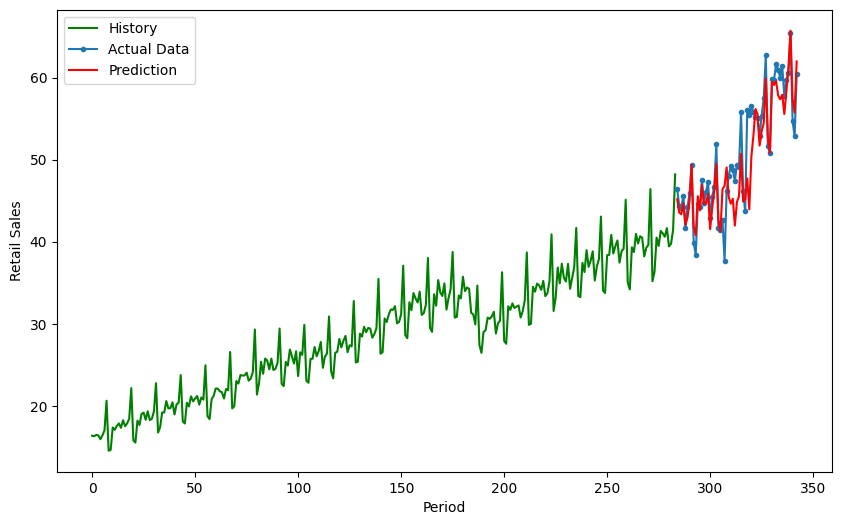

In [ ]:
# Plot the History (training) in green
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
# Plot the actual data (y_test) in blue
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
# Plot the predicted data (y_pred) in red
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
# Label x and y axis
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend() # Show legend on graph
plt.show(); # Show graph

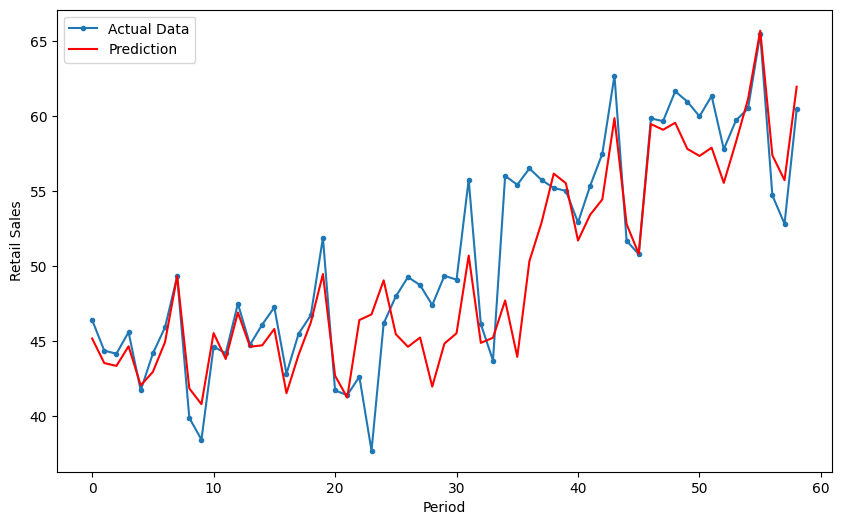

In [ ]:
# Plot actual data (y_test) as dotted line (in default blue)
plt.plot(y_test, marker='.', label="Actual Data")
# Plot predicted data (y_pred) as red line
plt.plot(y_pred, 'r', label="Prediction")
# Label x and y axis
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend() # Show legend on graph
plt.show(); # Show graph

In [ ]:
# Import libraries required for 1D-CNN model
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten

In [ ]:
# Define model 2 - 1-dimensional CNN model 
# Create a NN model
model2 = Sequential()
# Add 1-d conv layers of 50 filters, 
# with ReLU activation and having input size of (n_step,1)
model2.add(Conv1D(filters=50, kernel_size=2, 
                  activation='relu', input_shape=(n_steps, n_feature)))
model2.add(Conv1D(filters=50, kernel_size=2,activation='relu')) # Adding this (another) layer decreased MSE loss from 8. to 5.8
# Add a max pooling layer of size 2
model2.add(MaxPooling1D(pool_size=2))
# Add a layer to flatten the output
model2.add(Flatten())
# Add a layer of 50 nodes with ReLU activation method
model2.add(Dense(50, activation='relu'))
# Add the last output layer for a single value result
model2.add(Dense(1))
# Compile the model with MSE and Adam optimizer (SGD) with learning rate of 0.001
model2.compile(loss='mean_squared_error', optimizer=Adam(0.001))
# Give a model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 50)            150       
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 50)            5050      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 50)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                17550     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
# Train model 2 with x_train and y_train data
# Process the entire dataset 500 times, Evaluate 32 exmaples at each iteration,
# Use 10% for validation, Skip progress bar, Without shuffling data
history2 = model2.fit(x_train, y_train, epochs=500, batch_size=32,
                      validation_split=0.1, verbose=0, shuffle=False)

In [ ]:
# Generate prediction on x_test with model 2
y_pred2 = model2.predict(x_test)

2/2 [==============================] - 0s 8ms/step


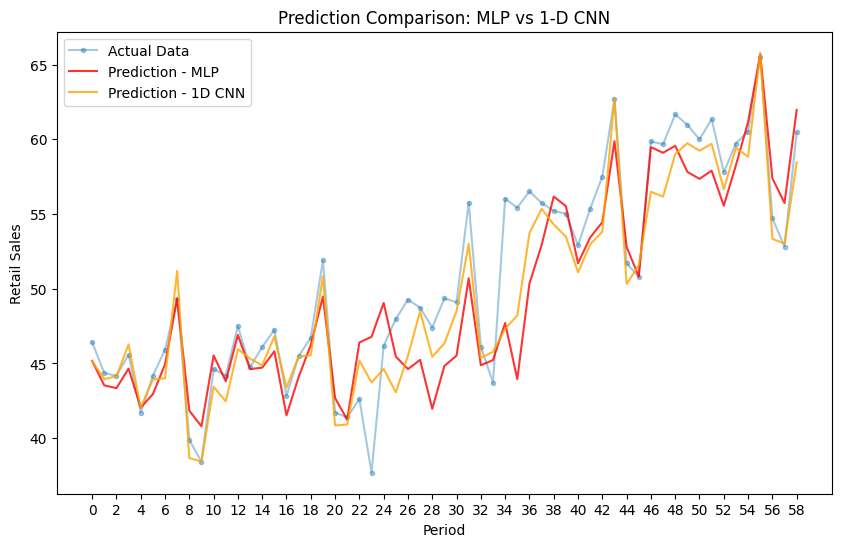

In [ ]:
# Plot actual data (y_test) as dotted line (in default blue)
plt.plot(y_test, marker='.', label="Actual Data", alpha=0.4)
# Plot predicted data (y_pred - MLP) as red line
plt.plot(y_pred, 'red', label="Prediction - MLP", alpha=0.8)
# Plot predicted data (y_pred 2 - 1D CNN) as orange line
plt.plot(y_pred2, 'orange', label="Prediction - 1D CNN", alpha=0.8)
# Label x and y axis
plt.ylabel('Retail Sales')
plt.xlabel('Period')
# Change x-axis tick size to 2
plt.xticks(np.arange(0, len(y_pred)+1, 2.0))
plt.title("Prediction Comparison: MLP vs 1-D CNN")
plt.legend() # Show legend on graph
plt.show(); # Show graph

In [ ]:
print("MLP: ",model1.evaluate(x_test, y_test))
print("1-D CNN: ",model2.evaluate(x_test, y_test))

2/2 [==============================] - 0s 10ms/step - loss: 10.1858
MLP:  10.185832023620605
2/2 [==============================] - 0s 10ms/step - loss: 5.8161
1-D CNN:  5.816120624542236


**Findings:**

The graph in cell #17 shows that both models can predict the general trend in sales and they are also quite accurate at predicting spikes. 

However, by comparing the model evaluation results above, 

*   MLP Model Loss (MSE):  10.1858
*   1-D CNN Model Loss (MSE):  5.8161

we can see Model 2 (1-d CNN) has slightly better prediction results.

For most of the spikes and dips (sudden increase and decrease), we can see yellow line is closer to the actual data. 

As Mean Square Error loss function penalizes large errors or outliers more than minor errors due to the square term, we can predict the predictions made by MLP was more penalized at bigger difference caused at points such as period #23 (lowest point in graph) and some unexpected peaks such as #31/34. 
